<font size=6><b> lec09_3. 군집분석(Clustering) - Hierachy

* 군집 분석 
    * 데이터를 비슷한 것끼리 그룹을 묶는 것
    * 데이터의 전반적 특징 파악에 유용
    * 답지(target)이 없는 비지도학습(unsupervised learning)


In [1]:
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.cluster import DBSCAN

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score 

import warnings
warnings.filterwarnings(action='ignore')
sns.set()

# Data Load

In [2]:
dataset = load_iris()
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset['target']
df.columns = ['sl', 'sw', 'pl','pw', 'target']
df.head()

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# HIERACHY

* scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)
* scipy.cluster.hierarchy.dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram

<pre>
단일기준결합방식 (single)   : 각 군집에서 중심으로부터 거리가 가까운 점과의 거리 계산
완전기준결합방식 (complete) : 각 군집에서 중심으로부터 가장 먼 점과의 거리 계산
평균기준결합방식 (average)  : 한 군집과 다른 군집에 속해 있는 모든 점과의 거리 계산

<img src="https://drek4537l1klr.cloudfront.net/rhys/v-7/Figures/CH17_FIG_3_MLR.png" width=500>

<pre>
최단 : <img src="https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-33.png" width=400>
최장 : <img src="https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-34.png" width=400>
평균 : <img src="https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-35-768x341.png" width=400>

## 스케일링

In [4]:
y = df['target']
X = df.drop(['target'], axis=1)

pca = PCA(n_components=2, random_state=1234)
X_pca = pca.fit_transform(X)

scaler = StandardScaler()
X_pca_scaler = scaler.fit_transform(X)
pca_df = pd.DataFrame(X_pca_scaler) #, columns=["pc1","pc2"])


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1
  0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1
  1 1 0 0 1 0]]


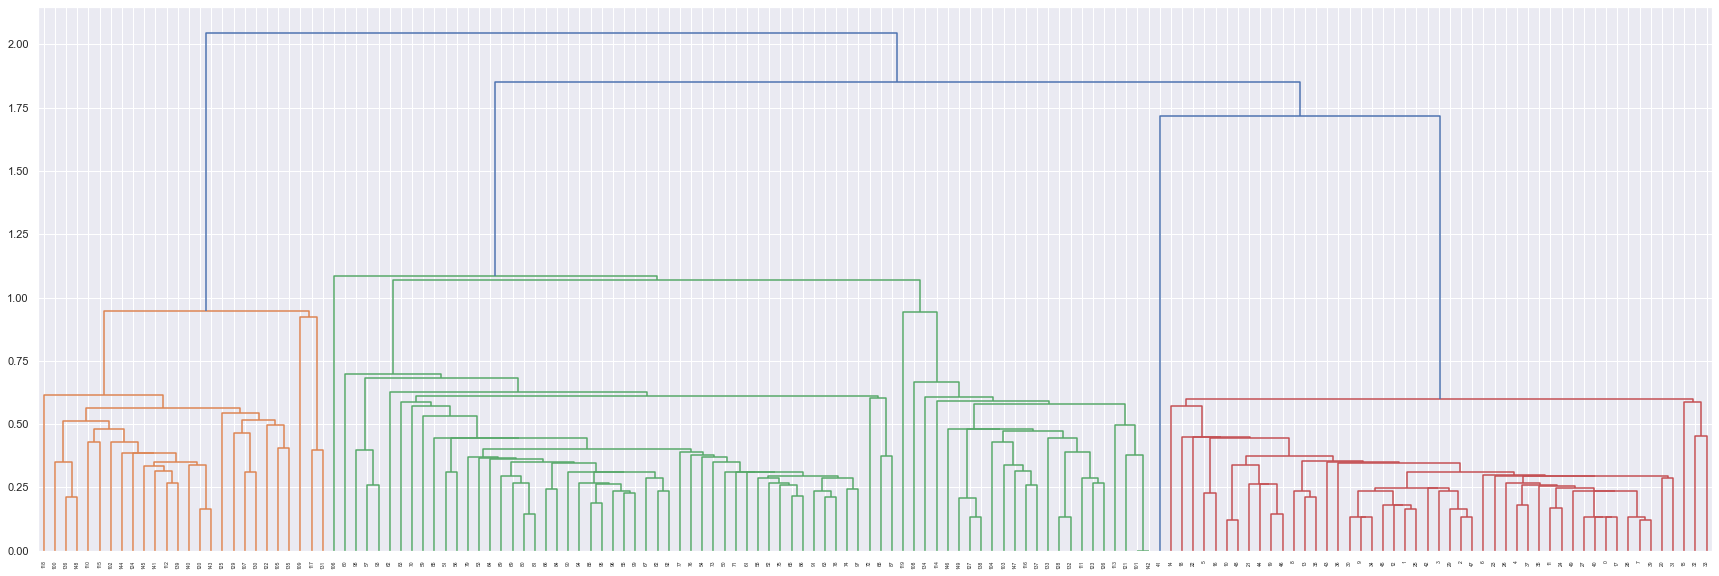

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1
  0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1
  1 1 0 0 1 0]]


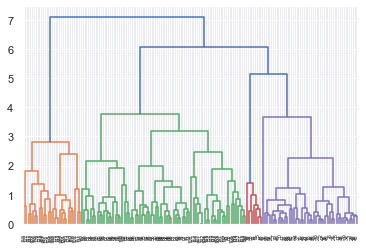

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1]]


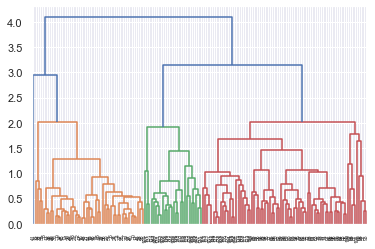

In [26]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cut_tree

method_list = ['single',  'complete' , 'average']
plt.figure(figsize=(30,10))
for m in method_list:
    dis_matrix  = linkage(pca_df, method=m)
    
    cluster_info = cut_tree(dis_matrix, 2)
    print(cluster_info.T)

    # T = cluster(dis_matrix,'maxclust',3);
    # print(T)
    
    # print(dis_matrix[:5])
    dendrogram(dis_matrix, labels=pca_df.index)
    plt.show()
    plt.close()

# 버립시다.. 쓰지마세요...

# sklearn.cluster.AgglomerativeClustering

In [6]:
pca_df["target"] = y
pca_df.head()

,0,1,2,3,target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:

def my_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    plt.show()
    plt.close()


In [18]:
# linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’

for m in ['ward','complete','average','single']:
    print(f" {m} ==============")
    # model = AgglomerativeClustering(n_clusters=3, compute_distances=True)
    
    aggmodel = AgglomerativeClustering(distance_threshold=None,
                                   n_clusters=3,
                                   linkage = m, compute_distances=True
                                  )  
    
    
    pred = model.fit_predict(pca_df)
    my_dendrogram(model, truncate_mode="level", p=3)
    pca_df['cluster_no'] = pred

    ## 평가 & 검증
    cross_df = pd.crosstab(pca_df['cluster_no'], pca_df['target'])
    print(cross_df)
    

 ward ==============


TypeError: __init__() got an unexpected keyword argument 'compute_distances'